In [4]:
import xlrd
import numpy as np

workbook = xlrd.open_workbook('Correlation-data.xlsx')
sheet = workbook.sheet_by_name('Sheet1')

num_participants = 212
measures = ['Central Coherance', 'Central Count Score',
            'Peripheral Coherance', 'Peripheral Count Score'] 

data = np.zeros((212, len(measures)))

for i in range(num_participants):
    for j in range(len(measures)):
        
        data[i,j] = sheet.cell(i+1, j).value
        
print data

[[ 48.82        61.82        49.43        68.4       ]
 [ 20.52        70.74        29.38        62.73      ]
 [  6.49        67.09         9.79        79.03      ]
 [ 20.88        78.          27.93        83.75      ]
 [ 32.08        66.19        41.63        71.91      ]
 [ 45.93        70.27        41.18        73.16      ]
 [ 19.3         78.41        26.36        75.19      ]
 [ 13.71        76.          28.22        88.22      ]
 [ 25.8         60.74        30.41        78.88      ]
 [ 36.33        73.15        23.24        76.24      ]
 [ 39.58        46.87        36.13        46.91      ]
 [  6.08        80.69         9.47        77.595     ]
 [ 23.96        74.5         36.99        63.49      ]
 [ 18.19        61.26        23.275       78.595     ]
 [ 18.77        78.33        18.85        82.39      ]
 [  6.98        61.96        12.96        76.73      ]
 [ 14.26        41.75        38.49        51.75      ]
 [ 17.81        40.41        30.43        51.46      ]
 [ 12.7   

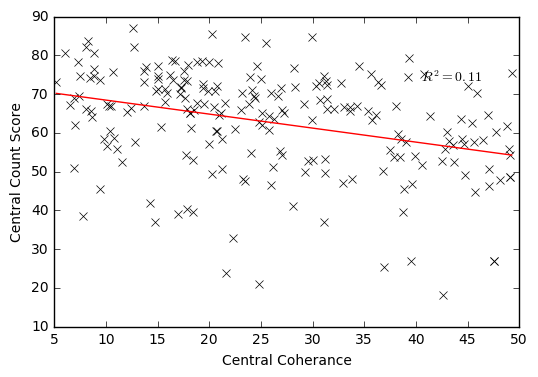

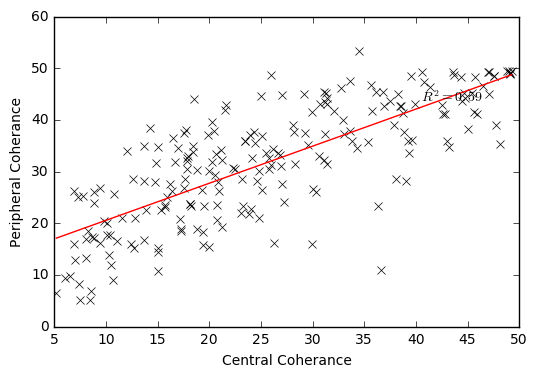

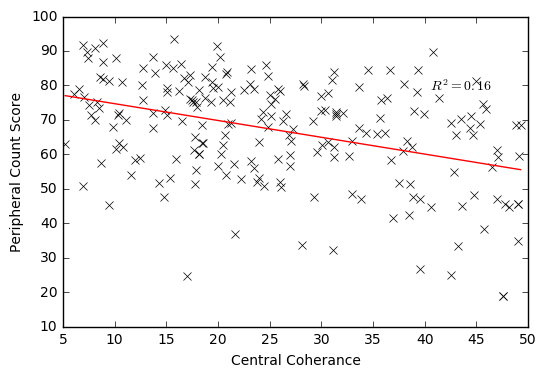

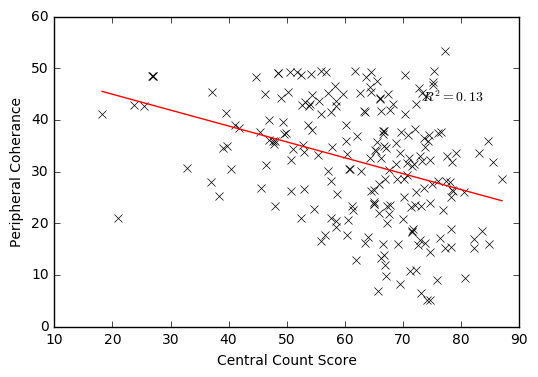

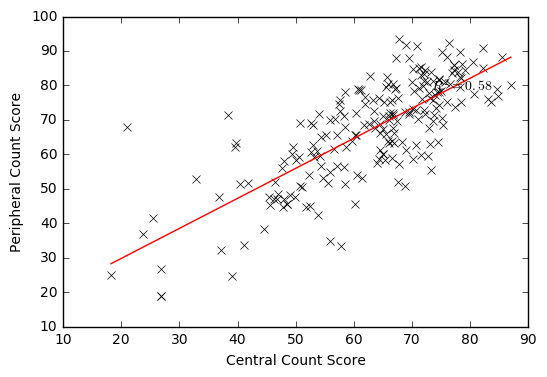

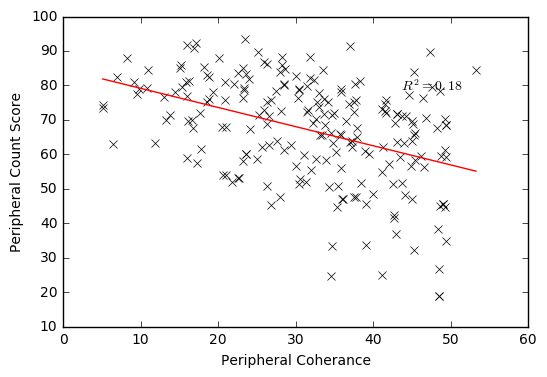

In [19]:
import matplotlib.pyplot as plt

def trendline(xd, yd, order=1, c='r', alpha=1, Rval=False):
    """Make a line of best fit"""

    #Calculate trendline
    coeffs = np.polyfit(xd, yd, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minxd = np.min(xd)
    maxxd = np.max(xd)

    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept

    #Plot trendline
    plt.plot(xl, yl, c, alpha=alpha)

    #Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot

    if not Rval:
        #Plot R^2 value
        plt.text(0.8 * maxxd + 0.2 * minxd, 0.8 * np.max(yd) + 0.2 * np.min(yd),
                 '$R^2 = %0.2f$' % Rsqr)
    else:
        #Return the R^2 value:
        return Rsqr

for i in range(len(measures)):
    
    measure1 = measures[i]
    
    for j in range(i+1, len(measures)):
        
        measure2 = measures[j]
        
        plt.plot(data[:,i], data[:,j], 'xk')
        trendline(data[:,i], data[:,j])
        plt.xlabel(measure1)
        plt.ylabel(measure2)
        plt.show()
        

# plt.plot(data[:,0], data[:,1], 'xb')
# plt.show()

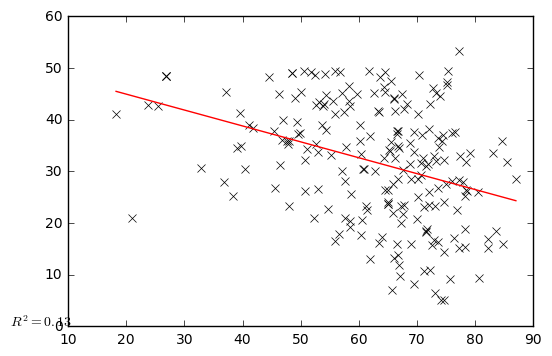

In [18]:
def trendline(xd, yd, order=1, c='r', alpha=1, Rval=False):
    """Make a line of best fit"""

    #Calculate trendline
    coeffs = np.polyfit(xd, yd, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minxd = np.min(xd)
    maxxd = np.max(xd)

    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept

    #Plot trendline
    plt.plot(xl, yl, c, alpha=alpha)

    #Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot

    if not Rval:
        #Plot R^2 value
        plt.text(0.8 * maxxd + 0.2 * minxd, 0.8 * np.max(yd) + 0.2 * np.min(yd),
                 '$R^2 = %0.2f$' % Rsqr)
    else:
        #Return the R^2 value:
        return Rsqr

plt.plot(data[:,1], data[:,2],'xk')
trendline(data[:,1], data[:,2], Rval=False)
plt.show()